# Importing

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os.path
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

# Preparing the data

In [69]:
data = 'Kaggle/brain_tumor_dataset'

classes = os.listdir(data)

img_dir = Path(data)

file_path = (list(img_dir.glob(r'**/*.jpg')) + 
             list(img_dir.glob(r'**/*.png')) + 
             list(img_dir.glob(r'**/*.jpeg')))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))
              
paths = pd.Series(file_path, name = 'Path').astype(str)
labels = pd.Series(labels, name = 'Label')

df = pd.concat([paths, labels], axis = 1)
              
df

,Path,Label
0,Kaggle\brain_tumor_dataset\no\10 no.jpg,no
1,Kaggle\brain_tumor_dataset\no\11 no.jpg,no
2,Kaggle\brain_tumor_dataset\no\12 no.jpg,no
3,Kaggle\brain_tumor_dataset\no\13 no.jpg,no
4,Kaggle\brain_tumor_dataset\no\14 no.jpg,no
...,...,...
248,Kaggle\brain_tumor_dataset\no\2 no.jpeg,no
249,Kaggle\brain_tumor_dataset\no\48 no.jpeg,no
250,Kaggle\brain_tumor_dataset\no\no 5.jpeg,no
251,Kaggle\brain_tumor_dataset\no\no 7.jpeg,no


# Creating training, validation and test dataset

In [165]:
train_df, dummy_df = train_test_split(df, train_size = 0.8)
valid_df, test_df = train_test_split(dummy_df, test_size = 0.3)

# Generating different images

**With this feature our models will be able to train on images, that has different attributions, giving more opportunity to learn.**

In [166]:
gen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    vertical_flip = True,
    fill_mode = 'nearest')

# Loading in the data

In [167]:
train = gen.flow_from_dataframe(
    train_df,
    x_col = 'Path',
    y_col = 'Label',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'categorical')

valid = gen.flow_from_dataframe(
    valid_df,
    x_col = 'Path',
    y_col = 'Label',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'categorical')

test = gen.flow_from_dataframe(
    test_df,
    x_col = 'Path',
    y_col = 'Label',
    target_size = (224, 224),
    batch_size = 16,
    shuffle = False,
    class_mode = 'categorical')

Found 202 validated image filenames belonging to 2 classes.
Found 35 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.


# Creating our first model using MobileNetV2 

In [168]:
model = Sequential()

pretrained = tf.keras.applications.MobileNetV2(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'avg')

pretrained.trainable = False

model.add(pretrained)
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    restore_best_weights = True,
    patience = 10)

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

history = model.fit(train, validation_data = valid, epochs = 50, callbacks = [callback])

Epoch 1/50


C:\Users\ZEPHYRUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - accuracy: 0.7058 - loss: 0.5115 - val_accuracy: 0.8571 - val_loss: 0.4184
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.8960 - loss: 0.2421 - val_accuracy: 0.8571 - val_loss: 0.3390
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.8930 - loss: 0.2786 - val_accuracy: 0.8857 - val_loss: 0.3015
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - accuracy: 0.9054 - loss: 0.1715 - val_accuracy: 0.9143 - val_loss: 0.1567
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.9215 - loss: 0.1503 - val_accuracy: 0.8571 - val_loss: 0.2834
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.9679 - loss: 0.1311 - val_accuracy: 0.8571 - val_loss: 0.3689
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.9514 - loss: 0.1610 - val_accuracy: 0.8286 - val_loss: 0.5009
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - accuracy: 0.9576 - loss: 0.1080 - val_accuracy: 0.9143 - val_

In [169]:
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,750,664 (10.49 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 328,454 (1.25 MB)

# Plotting out our model performance

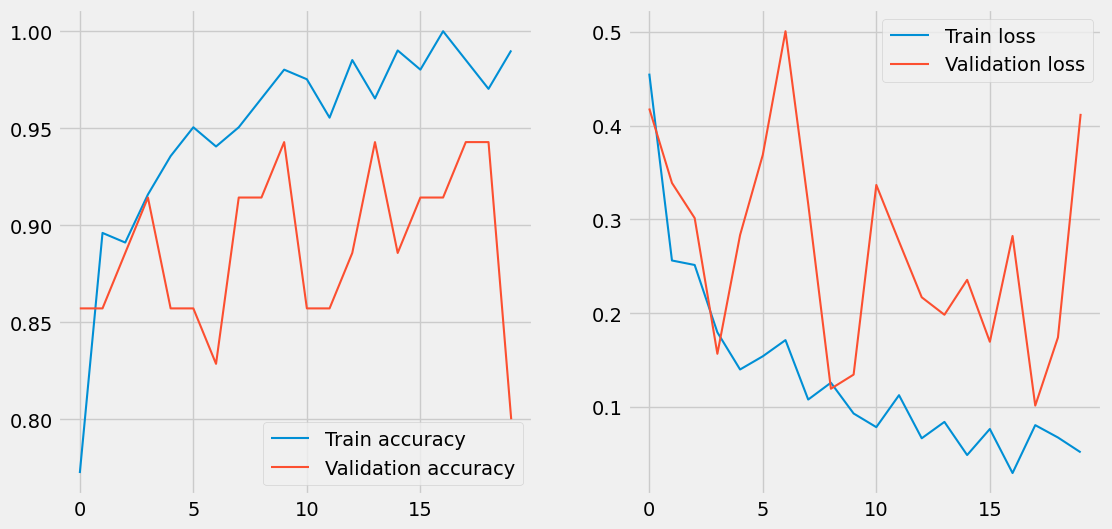

In [170]:
plt.style.use('fivethirtyeight')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['accuracy'], linewidth = 1.5, label = 'Train accuracy')
ax1.plot(history.history['val_accuracy'], linewidth = 1.5, label = 'Validation accuracy')
ax1.legend()

ax2.plot(history.history['loss'], linewidth = 1.5, label = 'Train loss')
ax2.plot(history.history['val_loss'], linewidth = 1.5, label = 'Validation loss')
ax2.legend()

plt.show()

# Evaluating the model on the test dataset

In [171]:
model.evaluate(test)

C:\Users\ZEPHYRUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.8750 - loss: 0.2077


[0.20766590535640717, 0.875]

# Prediction on the test dataset

In [172]:
prediction = model.predict(test)
y_prediction = np.argmax(prediction, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [173]:
print(classification_report(test.classes, y_prediction, target_names = classes))

              precision    recall  f1-score   support

          no       1.00      0.83      0.91         6
         yes       0.91      1.00      0.95        10

    accuracy                           0.94        16
   macro avg       0.95      0.92      0.93        16
weighted avg       0.94      0.94      0.94        16



# Creating our next model using VGG16

In [174]:
model2 = Sequential()

pretrained2 = tf.keras.applications.VGG16(
    input_shape = (224, 224, 3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'avg')

pretrained2.trainable = False

model2.add(pretrained2)
model2.add(Flatten())
model2.add(Dense(512, activation = 'relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation = 'softmax'))

callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    restore_best_weights = True,
    patience = 5)

model2.compile(
    optimizer = tf.keras.optimizers.Adam(1e-3),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

history2 = model2.fit(train, validation_data = valid, callbacks = [callback], epochs = 30)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 876ms/step - accuracy: 0.5166 - loss: 0.8345 - val_accuracy: 0.4857 - val_loss: 0.8565
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 861ms/step - accuracy: 0.6590 - loss: 0.7177 - val_accuracy: 0.7429 - val_loss: 0.5413
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 822ms/step - accuracy: 0.6816 - loss: 0.5774 - val_accuracy: 0.6000 - val_loss: 0.6081
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 834ms/step - accuracy: 0.6273 - loss: 0.6603 - val_accuracy: 0.6000 - val_loss: 0.6271
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 826ms/step - accuracy: 0.7010 - loss: 0.5632 - val_accuracy: 0.8571 - val_loss: 0.4373
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 826ms/step - accuracy: 0.8065 - loss: 0.4719 - val_accuracy: 0.8286 - val_loss: 0.4328
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 845ms/step - accuracy: 0.8131 - loss: 0.4340 - val_accuracy: 0.8571 - val_loss: 0.3818
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 829ms/step - accuracy: 0.8880 - loss: 0.4086 - val_accu

# Plotting out our model performance

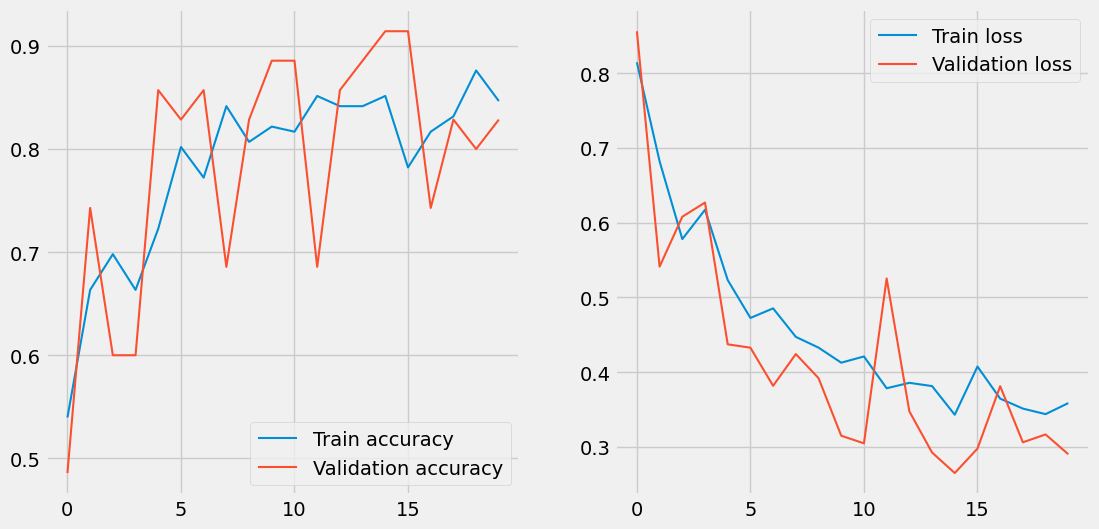

In [175]:
plt.style.use('fivethirtyeight')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history2.history['accuracy'], linewidth = 1.5, label = 'Train accuracy')
ax1.plot(history2.history['val_accuracy'], linewidth = 1.5, label = 'Validation accuracy')
ax1.legend()

ax2.plot(history2.history['loss'], linewidth = 1.5, label = 'Train loss')
ax2.plot(history2.history['val_loss'], linewidth = 1.5, label = 'Validation loss')
ax2.legend()

plt.show()

# Evaluating the model on the test dataset

In [176]:
model2.evaluate(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step - accuracy: 0.8750 - loss: 0.4058


[0.40583187341690063, 0.875]

# Prediction on the test dataset

In [177]:
prediction2 = model2.predict(test)
y_prediction2 = np.argmax(prediction2, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step


In [178]:
print(classification_report(test.classes, y_prediction2, target_names = classes))

              precision    recall  f1-score   support

          no       0.71      0.83      0.77         6
         yes       0.89      0.80      0.84        10

    accuracy                           0.81        16
   macro avg       0.80      0.82      0.81        16
weighted avg       0.82      0.81      0.81        16



# Conclusion
**The MobileNetV2 got a 94% accuracy while the VGG16 could get a 81% accuracy. Moreover, the first model's validation loss was 0.13, meanwhile the second model was only able to get a 0.26 validation loss. All in all, the first model has a better performance and by the reason of small validation loss it indicates high accuracy on unseen images.**